In [1]:
from query_data import*
from calculations import KPI, mass_balance, nitrogen_balance, carbon_balance
import matplotlib.pyplot as plt
import pandas as pd
import json
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from jsonfile_to_dict import json_to_dict

### select calculation type for calculation 

In [2]:
# user inputs for project ID/hermes
project_id = 693
#hermes_runs = ['H11630-3', 'H11630-4', 'H11630-5', 'H11695-5', 'H11695-6', 'H11695-7', 'H11759-5', 'H11759-6', 'H11759-7', 'H11800-7', 'H11800-8', 'H11800-9', 'H11958-5', 'H11958-6', 'H12078-5', 'H12078-6', 'H12078-7', 'H12185-5', 'H12185-6', 'H12263-5', 'H12263-6', 'H12185-7', 'H12185-8', 'H12381-5', 'H12381-6', 'H12263-7', 'H12460-3', 'H12460-4', 'H12489-3', 'H12489-4', 'H12539-3', 'H12539-4', 'H12569-3', 'H12569-4', 'H12620-3', 'H12620-4', 'H12569-5', 'H12569-6', 'H12664-3', 'H12664-4', 'H12691-3', 'H12691-4' 'H12746-3', 'H12746-4']
#hermes_runs = ['H11958-5', 'H11958-6', 'H12078-5', 'H12078-6', 'H12078-7', 'H12185-5', 'H12185-6', 'H12263-5', 'H12263-6', 'H12185-7', 'H12185-8', 'H12381-5', 'H12381-6', 'H12263-7', 'H12460-3', 'H12460-4', 'H12489-3', 'H12489-4', 'H12539-3', 'H12539-4', 'H12569-3', 'H12569-4', 'H12620-3', 'H12620-4', 'H12569-5', 'H12569-6', 'H12664-3', 'H12664-4', 'H12691-3', 'H12691-4' 'H12746-3', 'H12746-4']
hermes_runs = ['H11958-5', 'H11958-6']
# calculation type can be 'nitrogen balance', 'KPI', or 'mass balance'
calculation_type = 'mass balance'

In [3]:
(biomass_cleaned, titer_cleaned, RCS_df, lucullus_cleaned, RCS_lucullus) = query_data(project_id, hermes_runs)

Warehouse Username ········
Warehouse Password ········


In [4]:
# molar_weight = json_to_dict('molecular_weight.json')
# stoich = json_to_dict('stoichiometry.json') 
# n_source = json_to_dict('nitrogen_sources.json')

In [7]:
RCS_lucullus.to_csv('test1.csv')
RCS_df = RCS_lucullus

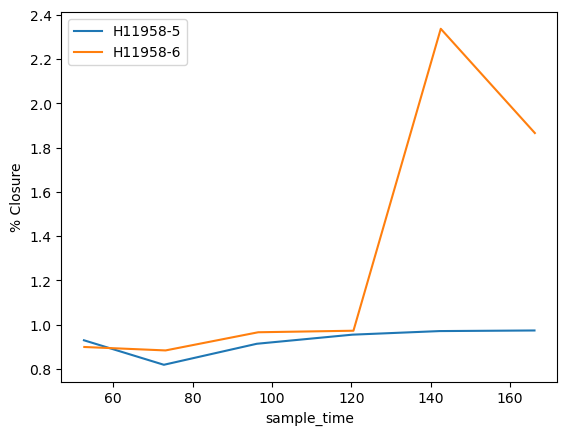

In [8]:
if calculation_type == 'nitrogen balance':
    n_balance = nitrogen_balance(RCS_df)
    # RCS_df.to_csv('Demon nitrogen balance.csv')
    
if calculation_type == 'carbon balance':
    c_balance = carbon_balance(RCS_df)
    # RCS_df.to_csv('Demon carbon balance.csv')
    
if calculation_type == 'KPI':
    pass
    # RCS_df.to_csv('Demon KPI.csv')
if calculation_type == 'mass balance':
    m_balance = mass_balance(RCS_df)
    # m_balance.to_csv('Demon mass balance.csv')
    
fig, ax = plt.subplots() # enable plotting in same figure
plt.ylabel('% Closure')
for key, hermes in m_balance.groupby(['hermes_run']):
    ax = hermes.plot(ax = ax, kind ='line', x='sample_time', y='Mass_closure', label = key) #key label names each line base on keys
